<div class="alert alert-block alert-info">
    
These blue boxes contain instructions for you to follow, or stuff for you to do
<h2>How to access this Jupyter notebook</h2>

* <b>Step 1</b>: Open a web browser,  and go to [this page](https://mnf144.csc.warwick.ac.uk:8987/module/CH274), 
* <b>Step 2</b>: Enter your SCRTP username and password and press the "Start Server" button.<br>
* <b>Step 3</b>: Wait (it could take a few minutes) until the blue blox says "Jupyter notebook server running!". At that point, click on the weblink below said message.<br>
* <b>Step 4</b>: Select the Jupyter Notebook you want to work on. Remember to make a copy of the orginal notebook (which is read only). To do so, in the toolbar on top of the notebook, select File and then Make a Copy <br>
* <b>Step 5</b>: You're all set! <br>
* <b>Step 6</b>: <font color="red">When you are done, remember to click the "Stop Server" button in the launcher web browser tab.</font> Please do, it's really quite important. <br>
<b> Remember: </b> You can access your copy of the Notebook at any time from any device off and on campus by going through the same steps on e.g. your laptop - all the changes you have made will be saved and synced! <br>

<div/>

# CH274 Computational Workshop 4

# Introduction to data fitting
It is often the case that in order to extract useful information from experimental data we need to fit it first. You have already met examples of this in the undergraduate labs (Iodination of acetone experiment) and the CH271 key skills workshop. 

## Real example of curve fitting
Examples of how curve fitting is used in a real phyical chemistry experiment are shown below. The video shows results obtained from a time-resolved infrared absorption experiment where a sample has been excited to its S$_{1}$ electronic state using a UV laser, and then probed after a series of time-delays (between 500 fs and 1000 ns) using an IR laser. The resulting spectra are very complicated, with vibrational peaks belonging to several different molecular isomers (in more than one electronic state) contributing to the signal. In addition to this, the size of the peaks change, and new features appear, as the pump/probe time delay increases:


<video  width="800" height="600" controls src="./STUFF/FitMov.mov" />



In the movie above, the experimental data points are the open circles. We can see that each of the time-resolved spectra have overlapping contributions from up to four different species. We can model these contributions using curve fitting (each component is represented as a sum of Gaussian functions - plotted as dashed lines), with the total fit to the experimental data shown by the solid blue line.

The intensities of the four components as a function of pump/probe time delay provide us with information about the kinetics of the system, allowing us to determine the primary quantum yields for the various decay pathways of the S$_{1}$ electronic state. In order to extract this detailed information however, we have to perform another series of curve fits to access the rate coefficients. Such data analysis often takes far longer to perform than the experiment itself!

## This session
In this session we will learn how the ```curve_fit``` package of the [SciPy](https://www.scipy.org) module can be used to fit experimental data. You will need to apply these skills over the Easter break in the final CH274 computational assignment, so it is vital that you read the material <b>carefully</b>, and attempt all five tasks (either in the session or your own time).

In [1]:
#load all the modules we will need for the workshop, and give them aliases
import numpy as np
import matplotlib.pyplot as plt

#Since we will only be using the 'curve_fit' package from SciPy, we will load this module alone rather 
#than the entire SciPy library
from scipy.optimize import curve_fit

# 1. Straight line fits
The simplest example of curve fitting, and the one you are probably most familiar with, is where we fit data to a straight line.  

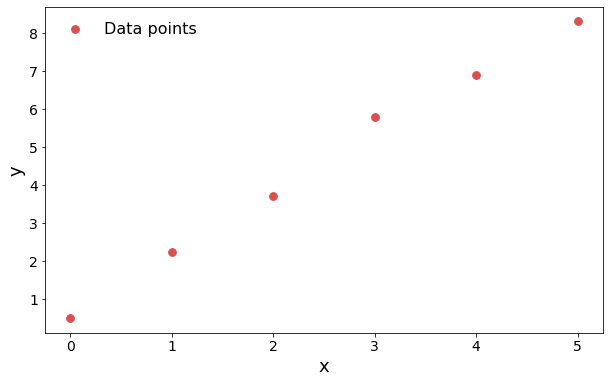

In [2]:
#LINEAR FITTING EXAMPLE - CREATING OUR DATA

#create x- and y-values lying roughly along a straight line
xdata_linear=np.array([0,1,2,3,4,5])
ydata_linear=np.array([0.5,2.23,3.7,5.8,6.9,8.3])

#plot the data as a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(xdata_linear,ydata_linear,s=60, c='#D9514E',label='Data points') #s=60 changes the size of the points

#Add axis labels and a plot legend, and make the font larger
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

## 1.1 Defining our fit function
To fit our data, we need to define a model function - the mathematical equation we are fitting our data to. Since we are fitting a straight line, we will make use of the usual equation for such a line: $$y(x)=mx+c$$
Where $x$ is the independent variable and $m$ (the gradient of the line) and $c$ (the y-intercept) are our fit parameters.

In [3]:
#LINEAR FITTING EXAMPLE - DEFINING OUR FIT FUNCTION

#define our model function (give it a sensible name), and declare the independent variable followed by the 
#fit parameters (x,m,c). 

def linFit(x,m,c): #note the semi-colon at the end of this line
    return m*x+c   #equation for a straight line


## 1.2. Fitting the data
Now that we have defined our model function, we can use it to fit our data ($i.e.$ find the best values for $m$ and $c$). To do this, we use the "curve_fit" command:

In [4]:
#LINEAR FITTING EXAMPLE - FITTING OUR DATA

#Use curve_fit command (part of scipy) to fit our data.
#Curve fit called with three arguments: the fit function (defined above), and the x and y-values 
#of the data we are fitting
popt,pcov=curve_fit(linFit,xdata_linear,ydata_linear) 

The ``curve_fit`` command returns two arrays as output, which we have chosen to call ```popt``` and ```pcov```, respectively. The 'popt' array contains the best-fit values for our fit-parameters (m and c). The order in which they appear in the array is the same as the order in which they were defined in the original fit function ('m' then 'c' in this case). We can view the best-fit values using the ```print(popt)``` command:

In [5]:
print(popt)

[1.57457143 0.63523811]


From this we can see that the gradient of our line is 1.57, with a y-intercept of 0.64. You should always check the quality of the fit by plotting the line of best fit along with the original data:

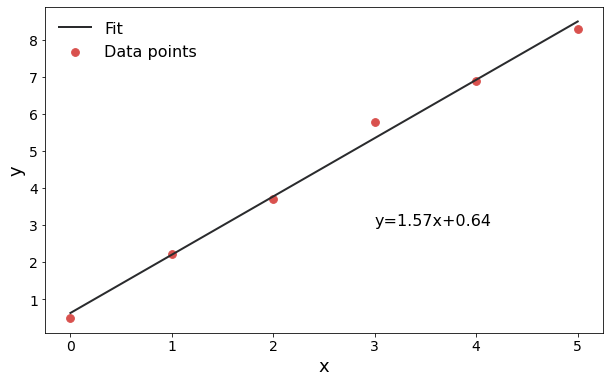

In [6]:
#LINEAR FITTING EXAMPLE - CHECKING THE QUALITY OF THE FIT

#Generate the line of best fit - y=mx+c:
yfit_linear=(popt[0]*xdata_linear)+popt[1] #popt[0]=m, popt[1]=c (remember that python counts from zero)

plt.figure(figsize=(10,6))

#plot the data and line of best fit
plt.scatter(xdata_linear,ydata_linear,s=60, c='#D9514E',label='Data points') #Original data
plt.plot(xdata_linear, yfit_linear,lw=2,c='#2A2B2D', label='Fit') #Fit to data

#add axis labels and a plot legend, and make the font larger
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

#Add line equation to the plot
plt.text(3,3,"y={:4.2f}x+{:4.2f}".format(popt[0],popt[1]),fontsize=16) 
plt.show()

## 1.3. What about 'pcov'?
The 'pcov' array generated above is the covariance matrix for the fit. In general, it will be a $n\times n$ array, where $n$ is the number of fit-parameters in the model function (in our example it is a $2\times 2$ array): 

In [7]:
print(pcov)

[[ 0.00378239 -0.00945599]
 [-0.00945599  0.03467195]]


This array contains all the information about the quality and reliability of our fit. The one standard-deviation uncertainties in our fit-parameters are the square-roots of the diagonal (top left to bottom right) elements. Again the order in which they appear are the order in which the fit parameters were defined in the original fit-function.

We can extract these directly from ``pcov`` using the ```np.sqrt(np.diag(ArrayName))``` command:

In [8]:
#LINEAR FITTING EXAMPLE - EXTRACTING FIT PARAMETER UNCERTAINITES

Error=np.sqrt(np.diag(pcov)) #np.diag extracts the diagonal elements of an array, np.sqrt takes the square-root

print('Gradient={:4.2f}, 1 S.D. uncertainty={:4.2f}'.format(popt[0],Error[0]))
print('Intercept={:4.2f}, 1 S.D. uncertainty={:4.2f}'.format(popt[1],Error[1]))

Gradient=1.57, 1 S.D. uncertainty=0.06
Intercept=0.64, 1 S.D. uncertainty=0.19


Its always a good idea to look at the off-diagonal elements of the covariance matrix too. These numbers tell you the degree of correlation between your fit parameters. Ideally you want these to be close to zero (this tells you that your fit parameters are independent of each other). Values approaching $\pm1$ indicate that the reliabaility of the fit is poor.

<div class="alert alert-block alert-info">

### <font>Task 1:</font>
Fit the following data to a straight line (use the ```linFit()``` function defined above). Determine the best-fit values for the gradient of the line, and their associated one standard deviation errors. Plot the results of your fit, and report the best-fit values for $m$ and $c$ along with their one standard-deviation uncertanties.

<div/>

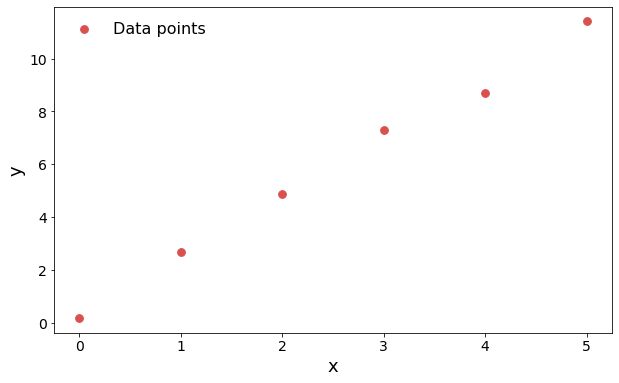

In [21]:
#Task 1 data:
x_task1=np.array([0,1,2,3,4,5])
y_task1=np.array([0.2,2.7,4.9,7.3,8.7,11.4])

plt.figure(figsize=(10,6))
plt.scatter(x_task1,y_task1,s=60, c='#D9514E',label='Data points') #s=60 changes the size of the points

#Add axis labels and a plot legend, and make the font larger
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

In [22]:
#Task 1 answer:
popt_t1,pcov_t1=curve_fit(linFit,x_task1,y_task1)

print(popt_t1)
print(pcov_t1)

[2.18285714 0.40952381]
[[ 0.00554558 -0.01386394]
 [-0.01386394  0.05083446]]


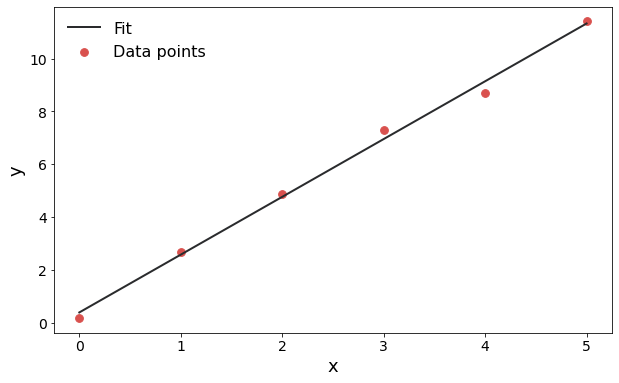

In [24]:
#plot line of best fit
yfit_t1=popt_t1[0]*x_task1+popt_t1[1]


plt.figure(figsize=(10,6))
plt.scatter(x_task1,y_task1,s=60, c='#D9514E',label='Data points') #s=60 changes the size of the points
plt.plot(x_task1, yfit_t1,lw=2,c='#2A2B2D', label='Fit')

#Add axis labels and a plot legend, and make the font larger
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

In [25]:
#print fit parameters and uncertainties
uncertainties_t1=np.sqrt(np.diag(pcov_t1))

print("Gradient={:4.2f}, 1 S.D. uncertainty={:4.2f}".format(popt_t1[0],uncertainties_t1[0]))
print("Intercept={:4.2f}, 1 S.D. uncertainty={:4.2f}".format(popt_t1[1],uncertainties_t1[1]))

Gradient=2.18, 1 S.D. uncertainty=0.07
Intercept=0.41, 1 S.D. uncertainty=0.23


# 2. Non-linear Curve FItting
Oftentimes our data is not going to lie on a straight line, and so we need to fit it to a more complicated, non-linear, function. We achieve this in largely the same manner as we used for straight line fits.

Lets demonstrate this by fitting an exponential decay of the form $y(x)=e^{-kx}+c$: 

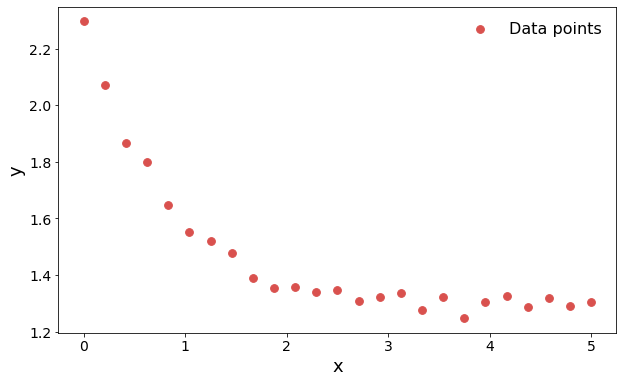

In [26]:
#NONLINEAR FITTING EXAMPLE - CREATING OUR DATA

#x- and y-values for exponentially decaying curve:
xdata_nonlin=np.array([0.        , 0.20833333, 0.41666667, 0.625     , 0.83333333,
       1.04166667, 1.25      , 1.45833333, 1.66666667, 1.875     ,
       2.08333333, 2.29166667, 2.5       , 2.70833333, 2.91666667,
       3.125     , 3.33333333, 3.54166667, 3.75      , 3.95833333,
       4.16666667, 4.375     , 4.58333333, 4.79166667, 5.        ])
ydata_nonlin=np.array([2.29571132, 2.07101355, 1.86747534, 1.7982708 , 1.6465569 ,
       1.55285214, 1.51899243, 1.47650864, 1.38996595, 1.35309758,
       1.3564634 , 1.34031022, 1.3479142 , 1.30895075, 1.32096505,
       1.33756549, 1.27642251, 1.32362688, 1.24847808, 1.30583286,
       1.32490246, 1.28569048, 1.32053396, 1.29062279, 1.30465078])

#Plot the data
plt.figure(figsize=(10,6))
plt.scatter(xdata_nonlin,ydata_nonlin,s=60, c='#D9514E', label='Data points')

#add axis labels and a plot legend, and make the font larger
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

## 2.1. Defining the fit function
Our first step is to  write a python function defining the equation we are fitting the data to:
$$y=e^{-kx}+c$$

In [27]:
#NONLINEAR FITTING EXAMPLE - DEFINING OUR FIT FUNCTION

#define our model function (expFit), and declare the independent variable, x, followed 
#by the two fit parameters, k & c

def expFit(x,k,c): 
    return np.exp(-k*x)+c

## 2.2. Initial fit-parameter guesses
The key difference between linear and non-linear fits is that we need to provide ```curve_fit``` with initial guesses for the fit parameters $k$ and $c$. We do this by creating an array and filling it with our initial guesses:

In [33]:
#NONLINEAR FITTING EXAMPLE - INITIAL GUESSES FOR FIT PARAMETERS

#our initial guesses for the values of k and c - if these are too far out the fit will not work
guessParams=[9.0,4.8] 

It is always a good idea to plot our trial function against the original data to see if our initial guesses are reasonable. If they are too far off, the fit will not work:

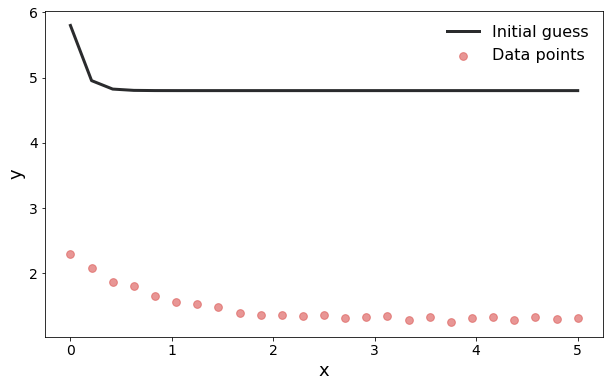

In [29]:
#Create our trial function using our initial guesses for k and c which are stored in the array guessParams
ytrial_nonlin=np.exp(-guessParams[0]*xdata_nonlin)+guessParams[1]

#plot the trial function against the original data to see if our guesses are reasonable - the trial
#function will roughly follow the data points if they are

plt.figure(figsize=(10,6))
plt.scatter(xdata_nonlin,ydata_nonlin,s=60, c='#D9514E',alpha=0.6, label='Data points')
plt.plot(xdata_nonlin,ytrial_nonlin,lw=3,c='#2A2B2D', label='Initial guess')

#add axis labels and a plot legend, and make the font larger
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

<div class="alert alert-block alert-info">

### <font>Task 2:</font>
The initial guesses provided above are clearly terrible (the 'initial guess' line does not go anywhere near the data points). As things stand the curve-fitting procedure will not work! Change the values in the ``guessParams`` array defined above until you get a better match between the data and the initial guess (note: the guesses don't have to be perfect, this shouldn't take you more than a couple of minutes at most)

<div/>

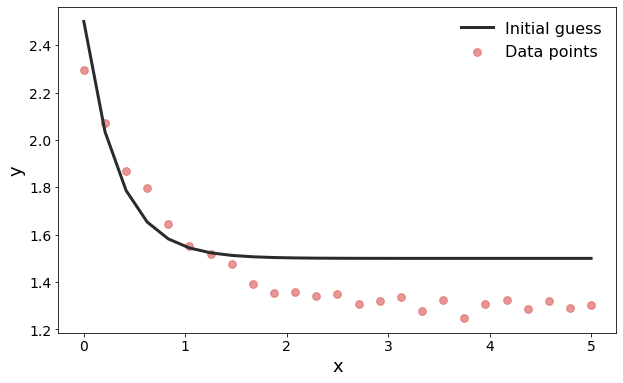

In [35]:
#Task 2 answer
#generate new parameter guesses and plot new trial fit
guessParams=[3.0,1.5]

ytrial_nonlin=np.exp(-guessParams[0]*xdata_nonlin)+guessParams[1]

#plot the trial function against the original data to see if our guesses are reasonable - the trial
#function will roughly follow the data points if they are

plt.figure(figsize=(10,6))
plt.scatter(xdata_nonlin,ydata_nonlin,s=60, c='#D9514E',alpha=0.6, label='Data points')
plt.plot(xdata_nonlin,ytrial_nonlin,lw=3,c='#2A2B2D', label='Initial guess')

#add axis labels and a plot legend, and make the font larger
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

## 2.3. Curve fitting
Once our guesses look good, then we can proceed with the curve fitting. The actual data-fitting process is nearly identical to that used in the example of a straight line fit. The only difference is that we need to include a new argument in the ```curve_fit``` command - the name of the array containing our guessed fit-parameters:

In [36]:
#NONLINEAR FITTING EXAMPLE - FITTING THE DATA

#use the 'curve_fit' module to fit our data (xdata_nonlin,ydata_nonlin) using our user defined fit function (expFit) 
#with the initial guesses for the fit parameters (guessParams).
#popt contains the best-fit parameters, pcov is used for error analysis
popt, pcov = curve_fit(expFit, xdata_nonlin, ydata_nonlin, guessParams) 

Plotting the resultant line of best fit shows if we have been successful.

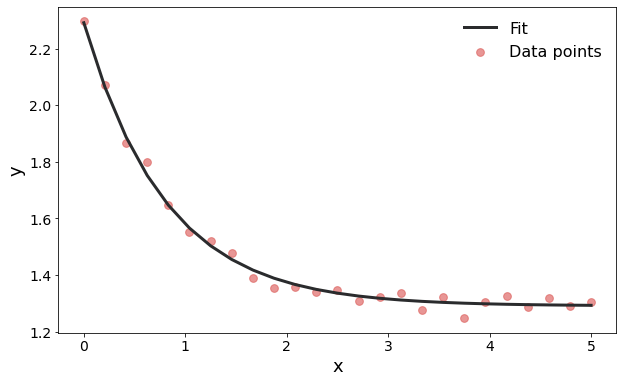

k = 1.24, 1 S.D. uncertainty=0.05
c = 1.291, 1 S.D. uncertainty=0.007


In [37]:
#Generate line of best fit
yfit_nonlin=np.exp(-popt[0]*xdata_nonlin)+popt[1]

#Plot the data and line of best fit
plt.figure(figsize=(10,6))
plt.scatter(xdata_nonlin,ydata_nonlin,s=60, c='#D9514E',alpha=0.6, label='Data points')
plt.plot(xdata_nonlin,yfit_nonlin,lw=3,c='#2A2B2D', label='Fit')

#add axis labels and a plot legend, and make the font larger
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

#Extract one standard deviation uncertainties for k and c from covariance matrix
err=np.sqrt(np.diag(pcov))

#Print the fit parameters along with their one standard deviation uncertainties
print('k = {:4.2f}, 1 S.D. uncertainty={:4.2f}'.format(popt[0],err[0]))
print('c = {:4.3f}, 1 S.D. uncertainty={:4.3f}'.format(popt[1],err[1]))

<div class="alert alert-block alert-info">

### <font>Task 3:</font>
The data in the file ```overlappingPeaks.csv``` describes a common situation in vibronic spectroscopy - that of overlapping spectral features. Read in the data from the ``STUFF`` folder (in the same directory as this python notebook), and plot the intensity (contained in the second column) against the wavenumber (first column).

If you cannot remember how to load a .csv file, reacquaint yourself with section 2 of KS_4. 
    
<div/>

In [41]:
#Task 3 answer:
#load the data
data_t3=np.loadtxt('./STUFF/overlappingPeaks.csv',delimiter=',',skiprows=1)

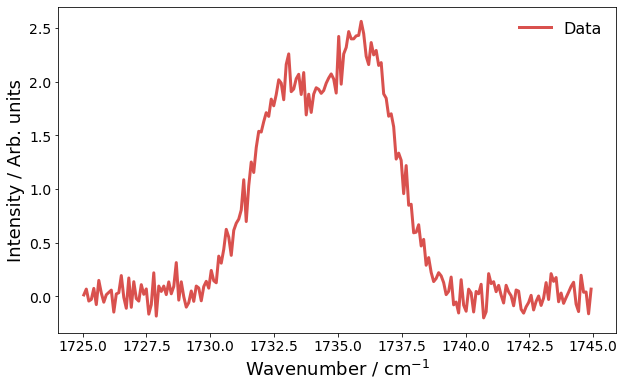

In [42]:
wavenumber_t3=data_t3[:,0]
intensity_t3=data_t3[:,1]

plt.figure(figsize=(10,6))

plt.plot(wavenumber_t3,intensity_t3,lw=3,c='#D9514E', label='Data')

#add all the window dressing
plt.xlabel('Wavenumber / cm$^{-1}$', fontsize=18)
plt.ylabel('Intensity / Arb. units', fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

<div class="alert alert-block alert-info">
 
### <font>Task 4:</font> 
We can decompose these two overlapping peaks using model functions (<i>c.f.</i> dashed lines in the video at the beginning of this notebook) to get the individual peak centres, peak widths, and peak intensities. In solution, vibrational line shapes are Gaussian functions:

$$y(x)=A\exp\left(-\left\{\frac{x-x_c}{w}\right\}^{2}\right)$$

where $A$ is the height of the Gaussian, $x_c$ is the $x$-value of the Gaussian's centre, and $w$ is its width.

Since our simulated data consists of two peaks, our fit function will be the sum of two Gaussians. To simplify things, we can make the assumption that the width of the two Gaussian functions are identical. With this assumption, our overall fit function becomes:


$$y(x)=A_1\exp\left(-\left\{\frac{x-x_{c1}}{w}\right\}^{2}\right)+A_{2}\exp\left(-\left\{\frac{x-x_{c2}}{w}\right\}^{2}\right)$$

Use this function to fit the spectral data. The indpendent variable ($x$) is the wavenumber. Initial guesses for the five fit-parameters can be read directly from the plot produced in task 3 (<i>i.e.</i> $A_1$ and $A_2$ are roughly 2, the peak centres ($x_{c1}$ and $x_{c2}$) lie between 1730 and 1740 cm$^{-1}$, and the width of both Gaussians ($w$) is roughly 2 cm$^{-1}$). 

Plot the results of your fit, and report the best-fit values for the peak heights, widths, and peak centres along with their one standard-deviation uncertaities.
 
<div/>

In [43]:
#Task 4 answer:
#Define fit function - 6 arguments, independent variable and 5 fit parameters
def multiGauss(x, A1, xc1, w, A2, xc2):
    return (A1*np.exp(-((x-xc1)/w)**2))+(A2*np.exp(-((x-xc2)/w)**2))

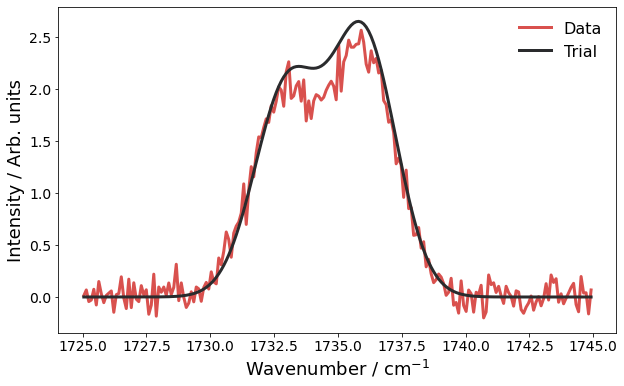

In [47]:
#define intitial guess parameters - read directly from above plot
gP_t4=[2.0, 1733.0, 1.8, 2.5, 1736.]

#plot data and initial guess - to ensure that guessParam_t4 is reasonable
y_trial_t4=(gP_t4[0]*np.exp(-((wavenumber_t3-gP_t4[1])/gP_t4[2])**2))+(gP_t4[3]*np.exp(-((wavenumber_t3-gP_t4[4])/gP_t4[2])**2))

plt.figure(figsize=(10,6))

plt.plot(wavenumber_t3,intensity_t3,lw=3,c='#D9514E', label='Data')
plt.plot(wavenumber_t3,y_trial_t4, lw=3, c='#2A2B2D', label='Trial')

#add all the window dressing
plt.xlabel('Wavenumber / cm$^{-1}$', fontsize=18)
plt.ylabel('Intensity / Arb. units', fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

In [49]:
#Fit the data 
popt_t4,pcov_t4=curve_fit(multiGauss,wavenumber_t3,intensity_t3,gP_t4)

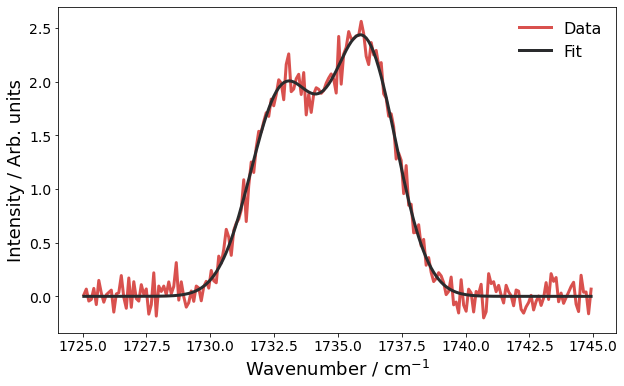

A1=1.88, 1 S.D error = 0.03
xc1=1732.83 cm^-1, 1 S.D error = 0.03 cm^-1
w=1.79 cm^-1, 1 S.D error = 0.02 cm^-1
A2=2.35, 1 S.D error = 0.03
xc2=1736.01 cm^-1, 1 S.D error = 0.02 cm^-1


In [53]:
#generate fit trace
y_Fit_t4=(popt_t4[0]*np.exp(-((wavenumber_t3-popt_t4[1])/popt_t4[2])**2))+(popt_t4[3]*np.exp(-((wavenumber_t3-popt_t4[4])/popt_t4[2])**2))

#plot data and line of best fit
plt.figure(figsize=(10,6))

plt.plot(wavenumber_t3,intensity_t3,lw=3,c='#D9514E', label='Data')
plt.plot(wavenumber_t3,y_Fit_t4, lw=3, c='#2A2B2D', label='Fit')

#add all the window dressing
plt.xlabel('Wavenumber / cm$^{-1}$', fontsize=18)
plt.ylabel('Intensity / Arb. units', fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

#determine uncertainties in fit parameters
Uncertainties_t4=np.sqrt(np.diag(pcov_t4))
print("A1={:4.2f}, 1 S.D error = {:4.2f}".format(popt_t4[0],Uncertainties_t4[0]))
print("xc1={:4.2f} cm^-1, 1 S.D error = {:4.2f} cm^-1".format(popt_t4[1],Uncertainties_t4[1]))
print("w={:4.2f} cm^-1, 1 S.D error = {:4.2f} cm^-1".format(popt_t4[2],Uncertainties_t4[2]))
print("A2={:4.2f}, 1 S.D error = {:4.2f}".format(popt_t4[3],Uncertainties_t4[3]))
print("xc2={:4.2f} cm^-1, 1 S.D error = {:4.2f} cm^-1".format(popt_t4[4],Uncertainties_t4[4]))

# 3. Simultaneous fitting of multiple datasets

Task 4 introduced you to the concept of decomposing a vibrational spectrum into a series of model functions (in this case a different Gaussian for each vibrational peak). In a real time-resolved experiment, you would want to repeat this fit for every pump-probe time-delay, extract the peak areas (proportional to the concentration of the molecular species), and plot these areas as a function of pump-probe time delay. Since the primary photochemical pathways available to a molecule all obey first-order kinetics, these plots will display exponential decay/growth curves.

## 3.1. A simple example: A &rarr; B first-order kinetics
For example, consider the case where our initially created species, $A$, has a single decay pathway open to it (this could be fluorescence back down to the ground electronic state, dissociation into fragments, internal conversion, <i>etc.</i>) with a rate coefficient $k$:

$$A\xrightarrow{k}B$$

The time-dependent concentrations of $A$ and $B$ are given by the following expressions (here we assume that only species $A$ is preset initially):

$$\begin{align*}
    [A]_{t}&=[A]_{0}e^{-kt}\\
    [B]_{t}&=[A]_{0}\left(1-e^{-kt}\right)
   \end{align*}$$
  
where $t$ is the pump/probe time delay, $[X]_{t}$ are the time-dependent concentrations of $A$ / $B$, and $[A]_{0}$ is the concentration of $A$ at $t=0$. 

Some simulated data is shown below (to simplify things $[A]_{0}=1$):

In [55]:
#Read in the simulated data - AtoB.csv has three columns, each with column headers
data=np.loadtxt('./STUFF/AtoB.csv',delimiter=',',skiprows=1)

#Split the array to extract the data for plotting/fitting 
#time is column 1, concntration of A is column 2, and concentration of B is column 3
time=data[:,0]
ConcA=data[:,1]
ConcB=data[:,2]


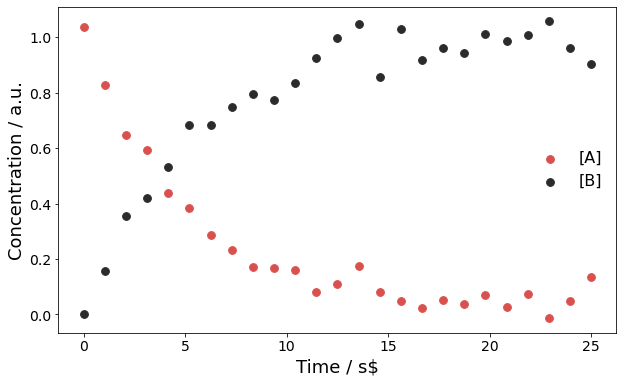

In [56]:
#Plot the simulated data
plt.figure(figsize=(10,6))

plt.scatter(time,ConcA,s=60,c='#D9514E',label='[A]')
plt.scatter(time,ConcB,s=60,c='#2A2B2D',label='[B]')

#add axis labels and a plot legend, and make the font larger
plt.xlabel('Time / s$',fontsize=18) 
plt.ylabel('Concentration / a.u.',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()


We can fit both of these curves separately using the methodology outlined above:

In [ ]:
#Define two fit functions, one for the decay of A, and one describing the growth of B
def expDecay(t,k):
    return np.exp(-k*t)

def expGrowth(t,k):
    return 1-np.exp(-k*t)

#initial guess for value of k 
guessParams=[0.5]

#Fit the two data sets independently
popt_decay,pcov_decay=curve_fit(expDecay,time,ConcA,guessParams) #[A] concentration
popt_growth,pcov_growth=curve_fit(expGrowth,time,ConcB,guessParams)#[B] concentration

#Generate best-fit curves
fitA=np.exp(-popt_decay[0]*time)
fitB=1-np.exp(-popt_growth[0]*time)

#Plot the data and lines of best fit
plt.figure(figsize=(10,6))
plt.scatter(time,ConcA,s=60,c='#D9514E',alpha=0.5,label='[A]')
plt.plot(time,fitA,lw=3,c='#D9514E')
plt.scatter(time,ConcB,s=60,c='#2A2B2D',alpha=0.5,label='[B]')
plt.plot(time,fitB,lw=3,c='#2A2B2D')

#add axis labels and a plot legend, and make the font larger
plt.xlabel('Time / s',fontsize=18) 
plt.ylabel('Concentration / a.u.',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

#print the best-fit parameters
err_decay=np.sqrt(np.diag(pcov_decay))
err_growth=np.sqrt(np.diag(pcov_growth))
print('k (decay)={:4.3f}, 1 S.D uncertainty={:4.3f}'.format(popt_decay[0],err_decay[0]))
print('k (growth)={:4.3f}, 1 S.D uncertainty={:4.3f}'.format(popt_growth[0],err_growth[0]))


The above fits have returned two different values for the same rate coefficient $k$! This is a common occurance because no experiment is perfect. The noise in the two curves above caused the fits to converge to two (slightly) different solutions. Which value should we use?

We can avoid this problem by fitting both data sets simultaneously, thereby obtaining a single, global, best fit value for $k$. This approach bulids upon that used above, but we need to add in a couple of new steps.

### (i) Define fit functions for each curve:
We begin by defining our individual fit functions (expDecay and expGrowth) in the usual manner:

In [ ]:
#Define two fit functions, one for the decay of A, and one describing the growth of B
def expDecay(t,k):
    return np.exp(-k*t)

def expGrowth(t,k):
    return 1-np.exp(-k*t)

### (ii) Create two new arrays, one containing all the x-data, and one containing all the y-data:
We next have to combine all of our concentration data into a single numpy array. This is achieved using the ```np.concatenate((dataset1,dataset2))``` command (note the use of <i>two</i> pairs of parentheses in this command) which adds 'dataset2' to the end of 'dataset1'. This step needs to be repeated for the time data:

In [ ]:
#create single numpy array containing all the concentration data, [A] followed by [B]
ConcA_B=np.concatenate((ConcA,ConcB))

#create single numpy array containing all the time data (append 'time' to itself)
TimeA_B=np.concatenate((time,time))

### (iii) Define fit function which performs the simultaneous fit of the data
We now need to define a new function, ``simFit``, which handles the simultaneous fit of all the data. The arguments for this function are the combined independent variable array (combinedTimeData), and all the fit parameters ($k$ only in this example)

In [ ]:
#define our simultaneous fit function (simFit), and declare the independent variable, combinedTimeData, followed 
#by the single fit parameter, k
def simFit(combinedTimeData,k):
#split our independent varible back into its original arrays
    time_1=combinedTimeData[:len(ConcA)] #takes the first n points from 'combinedXData' (n=length of 'ConcA')
    time_2=combinedTimeData[len(ConcB):] #takes the last m points from 'combinedXData' (m=length of 'ConcB')

#use the two extracted independent variable arrays in their respective fit functions
    result1=expDecay(time_1,k) #'A' data
    result2=expGrowth(time_2,k) #'B' data
    
    return np.append(result1,result2)

### (iv) Fit the data
As before, we need to supply an initial guess for the single fit parameter (we know from above that $k\approx 0.2$)

In [ ]:
guessParams=[0.2]

We call the ```curve_fit``` function in the usual manner, supplying the simultaneous fit function, combined x-data, combined y-data, and the fit parameter guesses as arguments:

In [ ]:
#Fit the data to the simultaneous fit function (simFit) using the combined x-data (TimeA_B), 
#combined y-data (ConcA_B), and our guessed fit parameters (guessParams)
popt,pcov=curve_fit(simFit,TimeA_B,ConcA_B,guessParams)

As usual, 'popt' contains the global best-fit value for $k$, and 'pcov' is related to its uncertainty:  

In [ ]:
#generate the global best-fit lines
simFitA=np.exp(-popt[0]*time)
simFitB=1-np.exp(-popt[0]*time)

#plot the data and results of simultaneous fit
plt.figure(figsize=(10,6))

plt.scatter(time,ConcA, s=60,c='#D9514E',alpha=0.5,label='[A]')
plt.plot(time,simFitA,lw=3,c='#D9514E')

plt.scatter(time,ConcB,s=60,c='#2A2B2D',alpha=0.5,label='[B]')
plt.plot(time,simFitB,lw=3,c='#2A2B2D')

#add axis labels and a plot legend, and make the font larger
plt.xlabel('Time / s',fontsize=18) 
plt.ylabel('Concentration / a.u.',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

#print the overall best-fit value for k
err=np.sqrt(np.diag(pcov))
print('k ={:4.3f}, 1 S.D uncertainty={:4.3f}'.format(popt[0],err[0]))

From the above, we see that fitting the two data sets simultaneously reveals the best fit value for the rate coefficient to be $k=0.191\pm0.006 \textrm{s}^{-1}$

## 3.2. A more complicated example: consecutive first-order processes, A &rarr; B &rarr; C 

Consider the following series of irreversible chemical reactions:

$$A^{*}\xrightarrow{k_{1}}B\xrightarrow{k_{2}}C$$

These rate equations can be solved analytically. If we assume that at time $t=0$, $[A]=[A]_{0}$, and $[B]=[C]=0$, then the time dependent concentrations of $A,\,B$ and $C$ are given by:

$$[A]_t=[A]_{0}e^{-k_{1}t}$$

$$[B]_t=\frac{k_{1}[A]_{0}}{k_{2}-k_{1}}\left\{e^{-k_{1}t}-e^{-k_{2}t}\right\}$$

$$[C]_t=\left\{1+\frac{k_{1}e^{-k_{2}t}-k_{2}e^{-k_{1}t}}{k_{2}-k_{1}}\right\}[A]_{0}$$

Again, to simplify things we shall assume that $[A]_0=1$

In [ ]:
#Set up simulated data sets (with noise)
time=np.linspace(0,25,50)
k1=np.abs(np.random.uniform(0.25,0.6)) #random number between 0.25 and 0.6
k2=np.abs(np.random.uniform(0.1,0.3)) #random number between 0.1 and 0.3

ConcA=np.exp(-k1*time)+np.random.normal(size=len(time), scale=0.03)
ConcB=(k1/(k2-k1))*(np.exp(-k1*time)-np.exp(-k2*time))+np.random.normal(size=len(time), scale=0.03)
ConcC=1+((k1*np.exp(-k2*time)-k2*np.exp(-k1*time))/(k2-k1))+np.random.normal(size=len(time), scale=0.03)

#Plot simulated data 
plt.figure(figsize=(10,6))
plt.scatter(time,ConcA,s=60,c='#D9514E',label='[A]')
plt.scatter(time,ConcB,s=60,c='#2A2B2D',label='[B]')
plt.scatter(time,ConcC,s=60,c='#2DA8D8',label='[C]')

#add axis labels and a plot legend, and make the font larger
plt.xlabel('Time / s',fontsize=18) 
plt.ylabel('Concentration / a.u.',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()


### 3.2.1. Defining the fit functions for each curve

As always, we first need to define our fit functions. In our kinetic scheme there are two fit parameters in total, $k_{1}$ and $k_2$. All three fit functions must include <i>both</i> of these as arguments, even if the function itself doesn't make use of all of them. For instance, the population of $A$ depends upon $k_{1}$ <b>only</b>, but the user defined fit function still needs to include $k_2$ in its initial definition ```def popA(x,k1,k2):```

In [ ]:
#Define fit functions for three populations
#Each function must be called with all the fit parameters used in the global fit, not all parameters
#are used by each fit function
def popA(t,k1,k2): 
    return np.exp(-k1*t)

def popB(t,k1,k2):
    return (k1/(k2-k1))*(np.exp(-k1*t)-np.exp(-k2*t))

def popC(t,k1,k2):
    return 1+((k1*np.exp(-k2*t)-k2*np.exp(-k1*t))/(k2-k1))

Guess at the fit paramaters and check by plotting

In [ ]:
# Initial fit guesses, [k1,k2]
guessParams=[0.4,0.2]

#Test initial guesses
trialA=np.exp(-guessParams[0]*time)
trialB=(guessParams[0]/(guessParams[1]-guessParams[0]))*(np.exp(-guessParams[0]*time)-np.exp(-guessParams[1]*time))
trialC=1+((guessParams[0]*np.exp(-guessParams[1]*time)-guessParams[1]\
            *np.exp(-guessParams[0]*time))/(guessParams[1]-guessParams[0]))

plt.figure(figsize=(10,6))
plt.scatter(time,ConcA,s=60,c='#D9514E',alpha=0.5,label='[A]')
plt.plot(time,trialA,lw=3,c='#D9514E')

plt.scatter(time,ConcB,s=60,c='#2A2B2D',alpha=0.5,label='[B]')
plt.plot(time,trialB,lw=3,c='#2A2B2D')

plt.scatter(time,ConcC,s=60,c='#2DA8D8',alpha=0.5,label='[C]')
plt.plot(time,trialC,lw=3,c='#2DA8D8')

#add axis labels and a plot legend, and make the font larger
plt.xlabel('Time / s',fontsize=18) 
plt.ylabel('Concentration / a.u.',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)
plt.show()

### 3.2.2. Preparing the data for fitting, and curve fitting

We need to combine all of the data into a single array, and pass this data to the global fit function ```simFit```:

In [ ]:
#Combine all the concentrations into a single array
ConcABC=np.concatenate((ConcA,ConcB,ConcC)) 
#repeat for the time data
timeABC=np.concatenate((time,time,time))

#define our simultaneous fitting function. The arguments are the combined time data and both of the fit parameters
def simFit(combinedTimeData,k1,k2):
    #split our independent variable back into its original arrays
    time_A=combinedTimeData[0:len(ConcA)] #Extract the first data set from combinedTimeData
    time_B=combinedTimeData[len(ConcA):2*len(ConcA)] #Extract the second dataset (all our data sets are the same length)
    time_C=combinedTimeData[2*len(ConcA):3*len(ConcA)]
    
    #Use the popA, popB, and popC functions defined earlier
    result1=popA(time_A,k1,k2)
    result2=popB(time_B,k1,k2)
    result3=popC(time_C,k1,k2)
    
    return np.append(result1,[result2,result3])

#Fit the data 
popt,pcov=curve_fit(simFit,timeABC,ConcABC,guessParams)

#Plot the data and best-fit curves 
simFitA=np.exp(-popt[0]*time)
simFitB=(popt[0]/(popt[1]-popt[0]))*(np.exp(-popt[0]*time)-np.exp(-popt[1]*time))
simFitC=1+((popt[0]*np.exp(-popt[1]*time)-popt[1]*np.exp(-popt[0]*time))/(popt[1]-popt[0]))

plt.figure(figsize=(10,6))
plt.scatter(time,ConcA,s=60,c='#D9514E',alpha=0.5,label='[A]')
plt.plot(time,simFitA,lw=3,c='#D9514E')

plt.scatter(time,ConcB,s=60,c='#2A2B2D',alpha=0.5,label='[B]')
plt.plot(time,simFitB,lw=3,c='#2A2B2D')

plt.scatter(time,ConcC,s=60,c='#2DA8D8',alpha=0.5,label='[C]')
plt.plot(time,simFitC,lw=3,c='#2DA8D8')

#add axis labels and a plot legend, and make the font larger
plt.xlabel('Time / s',fontsize=18) 
plt.ylabel('Concentration / a.u.',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)
plt.show()

#Determine the 1 S.D. errors and print along with the best fit vlaues for k1 and k2
err=np.sqrt(np.diag(pcov))
print('k1 ={:4.3f}, 1 S.D uncertainty={:4.3f}'.format(popt[0],err[0]))
print('k2={:4.3f}, 1 S.D uncertainty={:4.3f}'.format(popt[1],err[1]))

<div class="alert alert-block alert-info">

### <font>Task 5a:</font>
### Parallel first order processes: A&rarr; B; A&rarr; C

Consider the situation where our initially excited species can decay via two different pathways (<i>e.g.</i> fluorescence and intersystem crossing) simultaneously:

$$A\xrightarrow{k_{1}}B$$
and
$$A\xrightarrow{k_{2}}C$$

The data in the file ```parallelDecay.csv``` (located in the STUFF folder) contains some data simulating this type of kinetic chain. Read the data, and plot the concentrations of species $A$, $B$, and $C$ as a function of time. 
    
<div/>

In [62]:
#Task 5a answer:
data=np.loadtxt('./STUFF/parallelDecay.csv', delimiter=',',skiprows=1)

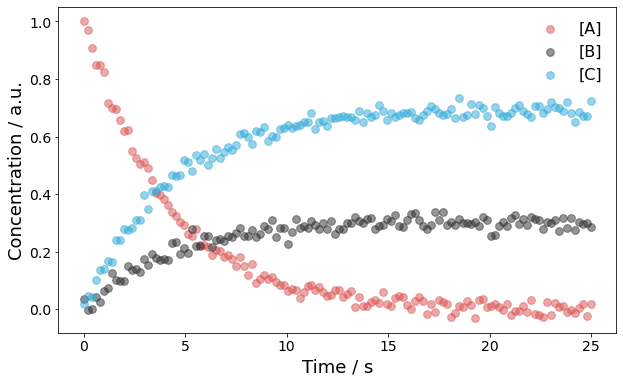

In [64]:
# split the data for plotting and fitting
# column1=time, column2=[A], column3=[B], column4=[C]
time=data[:,0]
ConcA=data[:,1]
ConcB=data[:,2]
ConcC=data[:,3]

#plot the data
plt.figure(figsize=(10,6))
plt.scatter(time,ConcA,s=60,c='#D9514E',alpha=0.5,label='[A]')
plt.scatter(time,ConcB,s=60,c='#2A2B2D',alpha=0.5,label='[B]')
plt.scatter(time,ConcC,s=60,c='#2DA8D8',alpha=0.5,label='[C]')

# Add axis labels etc.
plt.xlabel('Time / s', fontsize=18)
plt.ylabel('Concentration / a.u.', fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

In [61]:
print(data)

[[ 0.00000000e+00  1.03593006e+00  1.29096070e-03]
 [ 1.04166667e+00  8.28422281e-01  1.56789763e-01]
 [ 2.08333333e+00  6.47985998e-01  3.54876259e-01]
 [ 3.12500000e+00  5.94442935e-01  4.18997392e-01]
 [ 4.16666667e+00  4.39750143e-01  5.33744441e-01]
 [ 5.20833333e+00  3.85250945e-01  6.84124579e-01]
 [ 6.25000000e+00  2.88341826e-01  6.84555460e-01]
 [ 7.29166667e+00  2.31245489e-01  7.50125019e-01]
 [ 8.33333333e+00  1.70157139e-01  7.97156605e-01]
 [ 9.37500000e+00  1.67979788e-01  7.72401266e-01]
 [ 1.04166667e+01  1.59578243e-01  8.36351261e-01]
 [ 1.14583333e+01  8.01255760e-02  9.24972882e-01]
 [ 1.25000000e+01  1.11351059e-01  9.96155483e-01]
 [ 1.35416667e+01  1.73449517e-01  1.04962595e+00]
 [ 1.45833333e+01  8.22999055e-02  8.55593869e-01]
 [ 1.56250000e+01  4.92347359e-02  1.03193566e+00]
 [ 1.66666667e+01  2.28185406e-02  9.19333191e-01]
 [ 1.77083333e+01  5.39598113e-02  9.62666948e-01]
 [ 1.87500000e+01  3.90089452e-02  9.45266524e-01]
 [ 1.97916667e+01  7.09756149e-

<div class="alert alert-block alert-info">

### <font>Task 5b:</font>

The solutions to this kinetic system (if we once again assume that at time $t=0$, $[A]=[A]_{0}=1$, and $[B]=[C]=0$) are:

$$[A]_t=e^{-(k_{1}+k_{2})t}$$

$$[B]_t=\frac{k_{1}}{k_{1}+k_{2}}\left(1-e^{-(k1 + k2)t}\right)$$

$$[C]_t=\frac{k_{2}}{k_{1}+k_{2}}\left(1-e^{-(k1 + k2)t}\right)$$

Use these functions to simultaneously fit all three data sets to extract the global best-fit values for $k_{1}$ and $k_{2}$. Plot the results of your fit, and report the best-fit values for $k_{1}$ and $k_{2}$ along with their one standard-deviation uncertaities.
    
<div/>

In [80]:
#Task 5b answer
#Define the three individual fit functions
def popA(t,k1,k2):
    return np.exp(-(k1+k2)*t)

def popB(t,k1,k2):
    return (k1/(k1+k2))*(1-np.exp(-(k1+k2)*t))

def popC(t,k1,k2):
    return (k2/(k1+k2))*(1-np.exp(-(k1+k2)*t))

#Define the simultaneous fit function
def simFit(CombinedTimeData,k1,k2):
    time_A=CombinedTimeData[0:len(time)] #extract the first time dataset from CombinedTimeData
    time_B=CombinedTimeData[len(time):2*len(time)]
    time_C=CombinedTimeData[2*len(time):3*len(time)]
    
    result1=popA(time_A,k1,k2)
    result2=popB(time_B,k1,k2)
    result3=popC(time_C,k1,k2)
    
    return np.concatenate((result1,result2,result3))

In [83]:
#Combine all the concentrations into a single array
ConcABC=np.concatenate((ConcA,ConcB,ConcC))

# repeat for the time data
timeABC=np.concatenate((time,time,time))

#initial guesses for k1 and k2
gP=[0.1,0.2]

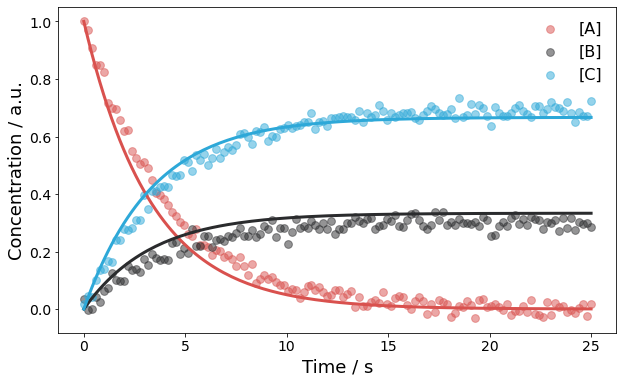

In [84]:
# generate trial fit functions
A_trial=np.exp(-(gP[0]+gP[1])*time)
B_trial=(gP[0]/(gP[0]+gP[1]))*(1-np.exp(-(gP[0]+gP[1])*time))
C_trial=(gP[1]/(gP[0]+gP[1]))*(1-np.exp(-(gP[0]+gP[1])*time))

#plot data and trial fits
#plot the data
plt.figure(figsize=(10,6))
plt.scatter(time,ConcA,s=60,c='#D9514E',alpha=0.5,label='[A]')
plt.plot(time,A_trial,lw=3,c='#D9514E')
plt.scatter(time,ConcB,s=60,c='#2A2B2D',alpha=0.5,label='[B]')
plt.plot(time,B_trial,lw=3,c='#2A2B2D')
plt.scatter(time,ConcC,s=60,c='#2DA8D8',alpha=0.5,label='[C]')
plt.plot(time,C_trial,lw=3,c='#2DA8D8')

# Add axis labels etc.
plt.xlabel('Time / s', fontsize=18)
plt.ylabel('Concentration / a.u.', fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

In [85]:
#Fit the data
popt_t5,pcov_t5=curve_fit(simFit,timeABC,ConcABC,gP)

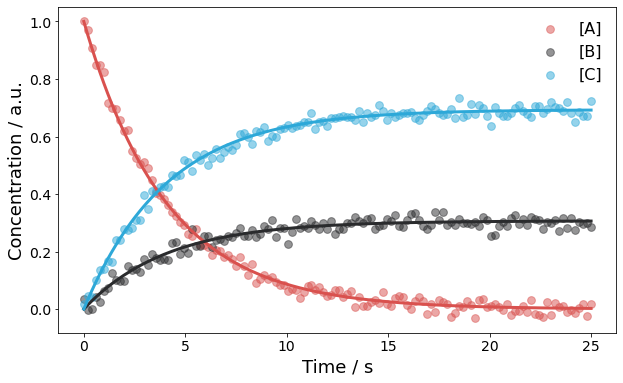

k1=0.075 s^-1, 1 S.D. error=0.001 s^-1
k2=0.170 s^-1, 1 S.D. error=0.001 s^-1


In [89]:
# generate best-fit functions
A_fit=np.exp(-(popt_t5[0]+popt_t5[1])*time)
B_fit=(popt_t5[0]/(popt_t5[0]+popt_t5[1]))*(1-np.exp(-(popt_t5[0]+popt_t5[1])*time))
C_fit=(popt_t5[1]/(popt_t5[0]+popt_t5[1]))*(1-np.exp(-(popt_t5[0]+popt_t5[1])*time))

#plot data and trial fits
#plot the data
plt.figure(figsize=(10,6))
plt.scatter(time,ConcA,s=60,c='#D9514E',alpha=0.5,label='[A]')
plt.plot(time,A_fit,lw=3,c='#D9514E')
plt.scatter(time,ConcB,s=60,c='#2A2B2D',alpha=0.5,label='[B]')
plt.plot(time,B_fit,lw=3,c='#2A2B2D')
plt.scatter(time,ConcC,s=60,c='#2DA8D8',alpha=0.5,label='[C]')
plt.plot(time,C_fit,lw=3,c='#2DA8D8')

# Add axis labels etc.
plt.xlabel('Time / s', fontsize=18)
plt.ylabel('Concentration / a.u.', fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

#Determine 1SD errors and print along with best-fit values for k1 and k2
err=np.sqrt(np.diag(pcov_t5))
print('k1={:4.3f} s^-1, 1 S.D. error={:4.3f} s^-1'.format(popt_t5[0],err[0]))
print('k2={:4.3f} s^-1, 1 S.D. error={:4.3f} s^-1'.format(popt_t5[1],err[1]))